In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [201]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]

import copy

from astropy.io import fits

import numpy as np
import pickle
import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.spectools as spectools
import darkhistory.spec.transferfunction as tf
from darkhistory.spec.spectrum import Spectrum
from darkhistory.spec.spectra import Spectra
import darkhistory.history.tla as tla

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.ics.ics_cooling import get_ics_cooling_tf

np.set_printoptions(threshold=np.nan)

In [3]:
user = 'hongwan'

highengphot_tflist = pickle.load(open("/Users/"+user+"/Dropbox (MIT)/Photon Deposition/tfunclist_photspec.raw", "rb"))
lowengphot_tflist  = pickle.load(open("/Users/"+user+"/Dropbox (MIT)/Photon Deposition/tfunclist_lowengphotspec.raw", "rb"))
lowengelec_tflist  = pickle.load(open("/Users/"+user+"/Dropbox (MIT)/Photon Deposition/tfunclist_lowengelecspec.raw", "rb"))
highengphot_tflist_before = pickle.load(open("/Users/"+user+"/Dropbox (MIT)/Photon Deposition/tfunclist_photspec.raw", "rb"))

# This is a list of mwimp values used to generate highengphot_tflist
mwimp_arr = np.array(highengphot_tflist.in_eng)

# This shouldn't be necessary. There is one negative value somewhere. Check.
# for tf in highengphot_tflist:
#     tf.grid_vals[np.where(tf.grid_vals < 0)] = 0
# for tf in lowengphot_tflist:
#     tf.grid_vals[np.where(tf.grid_vals < 0)] = 0
    
highengphot_tflist.transpose()
lowengphot_tflist.transpose()
lowengelec_tflist.transpose()
highengphot_tflist_before.transpose()

In [4]:
print(highengphot_tflist.tftype)

rs


In [5]:
eng_ind = 299

eleceng = np.logspace( 1, 13, 500)
# photeng = np.logspace(-4, 13, 500)
photeng = highengphot_tflist.in_eng[1::10]
print(photeng)
phot_spec_init = spectools.rebin_N_arr(np.array([2]), 
                                      np.array([mwimp_arr[eng_ind]]),
                                      photeng)

#Split photeng into high and low energy. 
photeng_high = photeng[photeng > 3070]
photeng_low  = photeng[photeng <= 3070]

# Split eleceng into high and low energy. 
eleceng_high = eleceng[eleceng > 3500]
eleceng_low  = eleceng[eleceng <= 3500]

# highengphot_tflist.in_eng set to photeng_high

highengphot_tflist.at_val('in_eng', photeng_high, bounds_error=False, fill_value=0)

for tf in highengphot_tflist:
    tf.rebin(photeng_high)
    # Pad with zeros so that it becomes photeng x photeng. 
    tf._grid_vals = np.pad(tf.grid_vals, ((photeng_low.size, 0), (photeng_low.size, 0)), 'constant')
    tf._N_underflow = np.pad(tf._N_underflow, (photeng_low.size, 0), 'constant')
    tf._eng_underflow = np.pad(tf._eng_underflow, (photeng_low.size, 0), 'constant')
    tf._in_eng = photeng
    tf._eng = photeng
highengphot_tflist.eng = photeng
highengphot_tflist.in_eng = photeng


[3.21164435e+03 4.81590859e+03 7.56362822e+03 1.13867298e+04
 1.72056994e+04 2.73437075e+04 4.19080490e+04 6.21870922e+04
 9.82850796e+04 1.45544416e+05 2.22700862e+05 3.54914515e+05
 5.40591519e+05 8.24792927e+05 1.25692622e+06 1.90080107e+06
 2.96884485e+06 4.52782527e+06 7.03055569e+06 1.05120063e+07
 1.58422978e+07 2.52986000e+07 3.84995288e+07 5.87270941e+07
 8.97213998e+07 1.37213313e+08 2.09984100e+08 3.21489073e+08
 4.92345474e+08 7.54144585e+08 1.15529294e+09 1.76996268e+09
 2.71180588e+09 4.15496883e+09 6.36629152e+09 9.75464622e+09
 1.49465377e+10 2.29019435e+10 3.50918134e+10 5.37700471e+10
 8.23902385e+10 1.26244244e+11 1.93440642e+11 2.96404006e+11
 4.54172199e+11 6.95916465e+11 1.06633517e+12 1.63391851e+12
 2.50361230e+12 3.83622239e+12]


../darkhistory/spec/spectra.py:852: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


../darkhistory/spec/spectra.py:852: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


[100.0, 10000000000000.0, 1e-10, 10000000000.0]

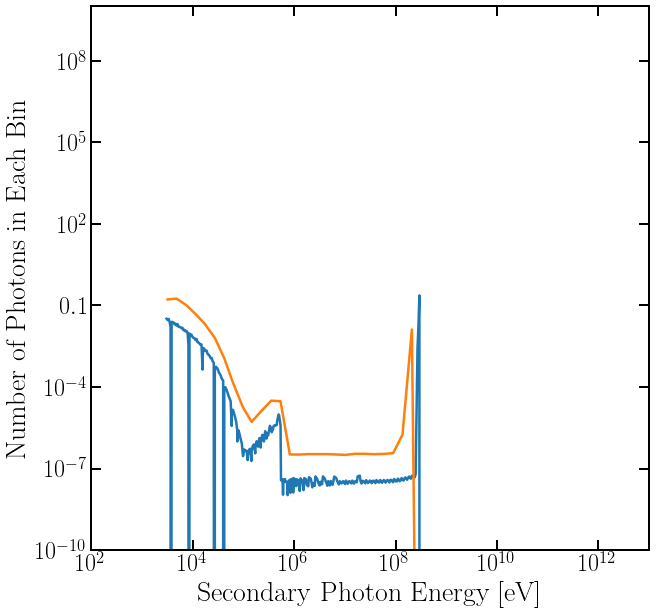

In [6]:
plt.figure()

ax = plt.gca()

eng_plot=3e8

highengphot_tflist_before[0].plot(ax, ind=eng_plot, indtype='in_eng')
a = copy.deepcopy(highengphot_tflist_before[0])
print(a)
a = a.at_in_eng(photeng, bounds_error=False, fill_value=0)
a.rebin(photeng)
a.plot(ax, ind=eng_plot, indtype='in_eng')
# highengphot_tflist[0].plot(ax, ind=eng_plot, indtype='in_eng')

ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Secondary Photon Energy [eV]')
plt.ylabel('Number of Photons in Each Bin')

plt.axis([1e2, 1e13, 1e-10, 1e10])

In [202]:
eng = np.array([1, 10, 100, 1e3, 1e4])
new_eng = 10**np.arange(-2, 6, 0.5)
spec = np.array([2, 40, 600, 8000, 100000])
# spec = np.array([1, 1, 1])
test1 = Spectrum(eng, spec, spec_type='N')
test2 = Spectrum(eng, spec, spec_type='N')
print(test1.toteng())
test1.rebin(new_eng)
test2.rebin_smooth(new_eng, a=0.5, b=0.5)
# test2.rebin_smooth(eng, a=0.5, b=0.5)

print(test1.totN())
print(test1.toteng())
print(test2.totN())
print(test2.toteng())
print(test2.N)

1008060402.0000001
108642.00000000001
1008060402.0000001
108642.00000000003
1008060402.0000001
[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.98285689e-01
 1.00000075e+00 1.25944725e+01 2.00003005e+01 1.92084388e+02
 3.00069263e+02 2.58829124e+03 4.01525632e+03 3.42507072e+04
 5.69821404e+04 1.02792581e+04 0.00000000e+00 0.00000000e+00]


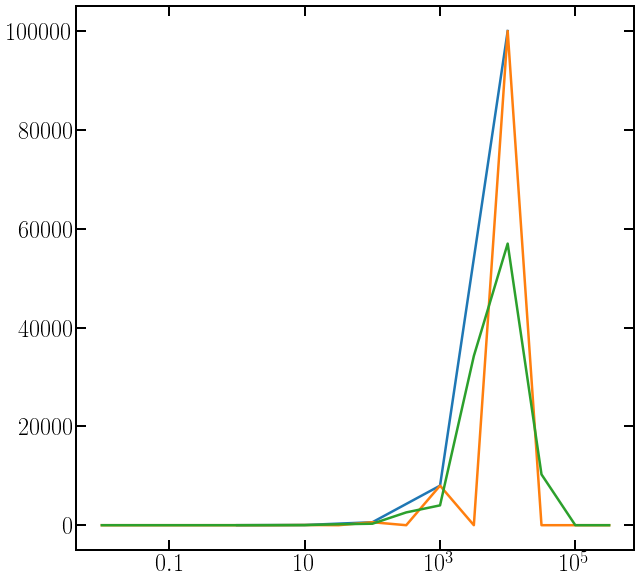

In [203]:
plt.figure()
plt.plot(eng, spec)
plt.plot(test1.eng, test1.N)
plt.plot(test2.eng, test2.N)

ax = plt.gca()
ax.set_xscale('log')